# Part II - Ford GoBike System Dataset

## by Samuel Tsuma

## Investigation Overview


The goal of this presentation is to show:

- The distributuion of bike users among user types
- Gender distribution of users as a whole and in repsective user types
- Age distribution across bike users
- The average ages for each gender across the user types



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It consists of 16 columns and a total of 183412 rows (inclusive of rows with missing values). Majority of the variables (9) are numeric (float and imteger) in nature, while the remaining (5) variables are categorical in nature. 


> **NOTE**: The analysis done on this dataset was limited to bike users ***born between 1941 
(currently aged 80) and the present year (2022)** and not based on the entire dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data = bike_df.copy()

In [3]:
# dropping rows without start station id
bike_data.drop(bike_data[bike_data['start_station_id'].isnull()].index,inplace=True)

# droppin rows without end station id
bike_data.drop(bike_data[bike_data['end_station_id'].isnull()].index,inplace=True)

In [4]:
# converting start_time and end_time to datetime.
bike_data['start_time'] = bike_data['start_time'].astype('datetime64')
bike_data['end_time'] = bike_data['end_time'].astype('datetime64')


# converting start_station_id and end_station_id from float to string.
bike_data['start_station_id'] = bike_data['start_station_id'].astype(str).replace('nan', np.nan)
bike_data['end_station_id'] = bike_data['end_station_id'].astype(str).replace('nan', np.nan)


# converting bike_id from int to string.
bike_data['bike_id'] = bike_data['bike_id'].astype(str)

In [5]:
# replacing NaN with zero then converting member_birth_year from float to int.

bike_data['member_birth_year'] = bike_data['member_birth_year'].replace(np.nan, 0)

In [6]:
bike_data['member_birth_year'] = bike_data['member_birth_year'].astype(int).replace(0, np.nan)

In [7]:
# dropping the rows

bike_data.drop(bike_data.loc[bike_data["member_birth_year"] <= 1940].index, inplace=True)

In [8]:
# creating new column age

current_year = 2022

bike_data['age'] = current_year - bike_data['member_birth_year']

In [9]:
# confirming dataset is in order
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183012 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183012 non-null  int64         
 1   start_time               183012 non-null  datetime64[ns]
 2   end_time                 183012 non-null  datetime64[ns]
 3   start_station_id         183012 non-null  object        
 4   start_station_name       183012 non-null  object        
 5   start_station_latitude   183012 non-null  float64       
 6   start_station_longitude  183012 non-null  float64       
 7   end_station_id           183012 non-null  object        
 8   end_station_name         183012 non-null  object        
 9   end_station_latitude     183012 non-null  float64       
 10  end_station_longitude    183012 non-null  float64       
 11  bike_id                  183012 non-null  object        
 12  user_type       

## Distribution of User Types

- Subscribers form the majority, accounting for 89% of bike users.
- Customers make up for 11% of bike users

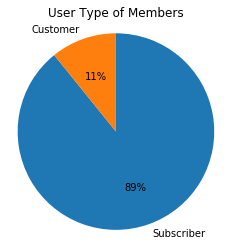

In [10]:
# function that takes in variable(column) and title
def pie_chart(col, ttl):
    
    plt.pie(col, labels=col.index, startangle = 90, autopct = '%0.0f%%', counterclock = False)
    plt.title(ttl)
    plt.axis('square');

    
user_type = bike_data['user_type'].value_counts()    
# plotting pie chart
pie_chart(user_type, 'User Type of Members')

## Subscriber(member) Gender Distribution

- Majority of the members (subscribers) are male who account for 75%
- The Female gender category accounts for 23% of the members
- Members identifying their gender as Other make up for 2% of the total.

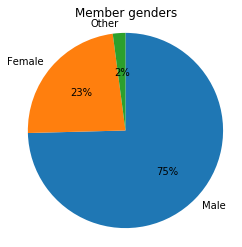

In [11]:
# getting value counts of member_gender
m_gender = bike_data['member_gender'].value_counts()
# plotting pie chart
pie_chart(m_gender, 'Member genders')

## Customers Gender Distribution

- Majority of the customers are male, accounting for 69% of non-members.
- Females account for 28% of the total
- LGBTQ community make up for 3% of the customers total.

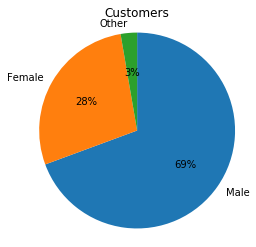

In [12]:
# filtering dataframe to gather user_types for customers only
customer = bike_data[bike_data['user_type'] == 'Customer']
#getting value counts for customers gender
cust_gender = customer['member_gender'].value_counts()
# plotting pie chart
pie_chart(cust_gender, 'Customers')

## Age Distribution

- Most bike users are aged between 25 and 45 years
- As age advances from 45 years, the number of users keep decreasing.

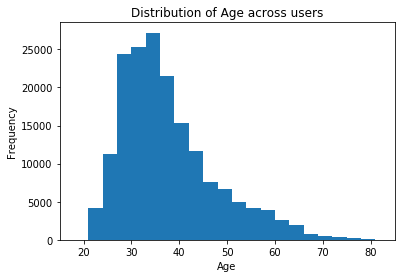

In [13]:
# Defining function for histograms

def hist_plot(d_set, x_ax, binz, x_lab, y_lab, ttl):
    
    plt.hist(data = d_set, x = x_ax, bins = binz)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(ttl)
    
    

bins = np.arange(0, bike_data['age'].max()+3, 3)
hist_plot(bike_data, 'age', bins, 'Age',
          'Frequency', 'Distribution of Age across users')
plt.xlim((15, 85));

## Age vs Gender vs User Type

- Generally, subscribers record slightly higher average ages across the gender categories
- Riders of the LGBTQ community have the highest average age among both customers and subscribers
- Female riders have the lowest average age among both customers and subscribers
- The average ages across the two User Type demographics are for middle-aged people



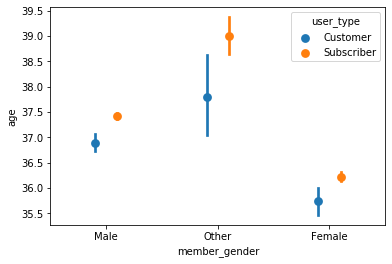

In [14]:
# pointplot -- member_gender vs age vs user_type
sb.pointplot(data = bike_data, x = 'member_gender', y = 'age', hue = 'user_type',
                  dodge = 0.2, linestyles = "");

### Thank You!

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [16]:
!jupyter nbconvert Part_2_FordGo.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_2_FordGo.ipynb to slides
[NbConvertApp] Writing 344404 bytes to Part_2_FordGo.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/home/samtsuma/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/home/samtsuma/anaconda3/lib/python3.7/site-packages/jupyter_core/application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/samtsuma/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/samtsuma/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "/home/samtsuma/anaconda3/lib/python3.7/site-packages/nb

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 